In [1]:
# Analysis of the breast cancer dataset 
# Logistic regression and Principal Components Analysis
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Load data
data = load_breast_cancer()

In [3]:
df = pd.concat([
    pd.DataFrame(data.data, columns=data.feature_names),
    pd.DataFrame(data.target, columns=['y'])
], axis=1)

# get the number of rows and columns
print(df.shape)

df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# exploratory data analysis
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [9]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

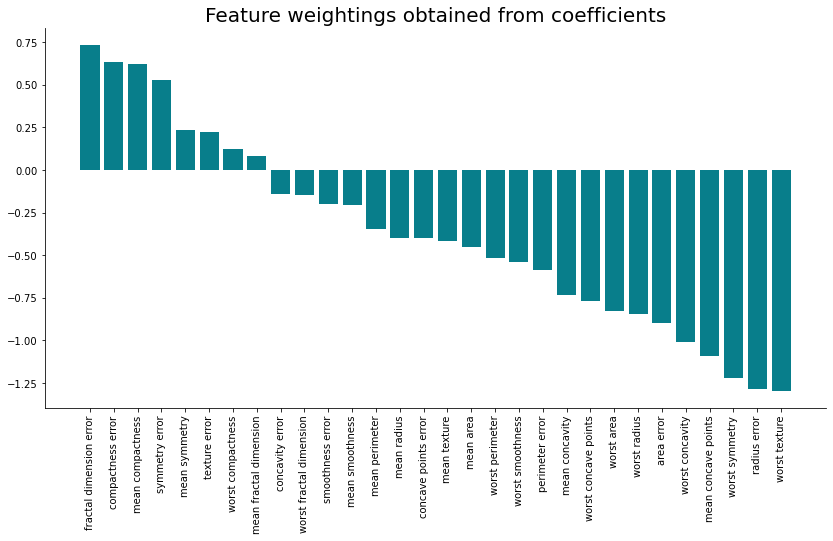

In [10]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature weightings obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
# Principal Components Analysis

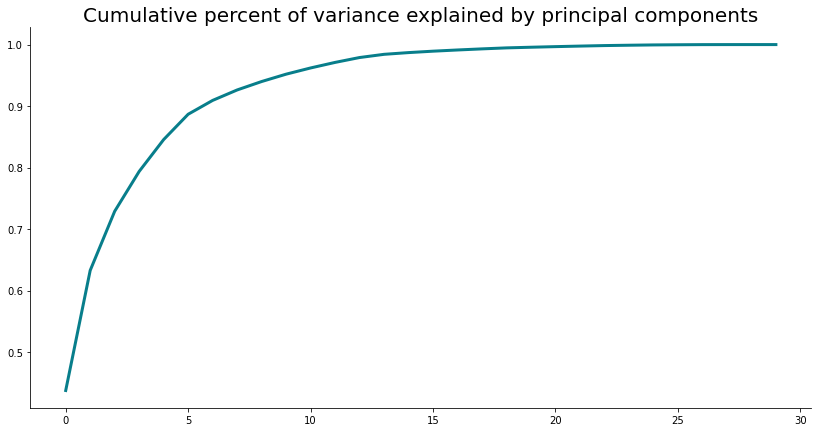

In [12]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative percent of variance explained by principal components', size=20)
plt.show()

In [13]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.783559,-0.577423,-0.015448,-0.061600,0.056542,0.032320,-0.126638,0.004863,0.102699,0.070119,...,-0.019487,0.005920,-0.020009,-0.019015,0.012820,-0.011914,0.008478,0.007393,0.006400,0.007589
mean texture,0.371967,-0.128012,0.088003,0.851102,0.034107,-0.121844,0.004254,0.094800,-0.168652,-0.010506,...,0.062076,0.024667,-0.020541,0.003951,-0.013367,-0.001341,0.001087,0.000095,-0.000306,0.000015
mean perimeter,0.816365,-0.534263,-0.016573,-0.063863,0.056378,0.028074,-0.117411,-0.001225,0.100753,0.057988,...,-0.016562,0.008804,-0.009313,-0.012118,0.003980,-0.012644,0.007687,0.000773,0.010616,-0.007530
mean area,0.793613,-0.568269,0.047940,-0.082217,0.015615,0.002670,-0.065409,0.037467,0.103161,0.088953,...,-0.006398,0.016201,-0.003763,0.022362,0.016413,0.037472,-0.033660,-0.008272,-0.012786,-0.000350
mean smoothness,0.536881,0.420954,-0.215548,-0.176923,-0.483525,-0.299995,-0.094875,-0.210312,0.002419,-0.097695,...,-0.015056,-0.000303,-0.002806,0.009027,-0.005208,-0.001012,-0.005563,0.000248,-0.000021,-0.000050
